# Binary Classification with a Bank Churn 

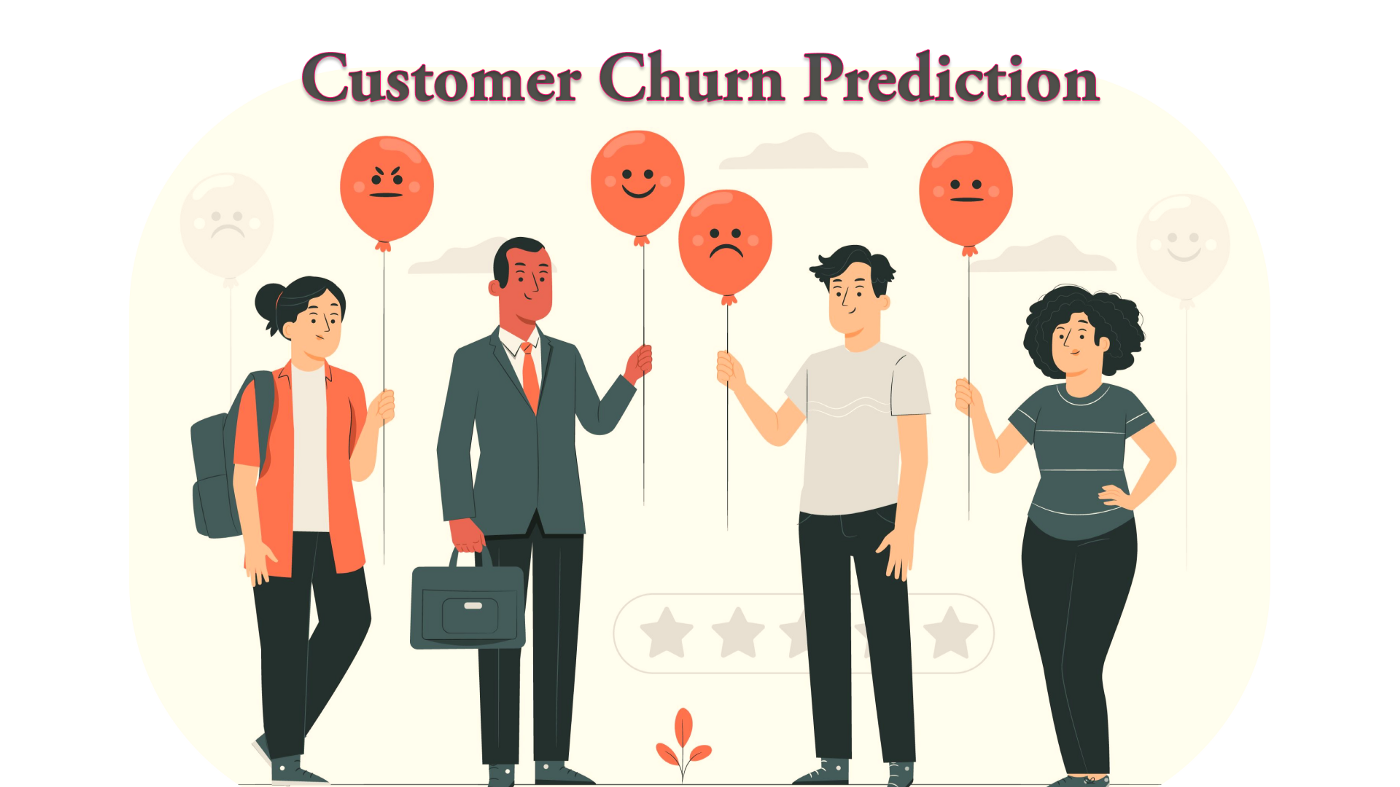
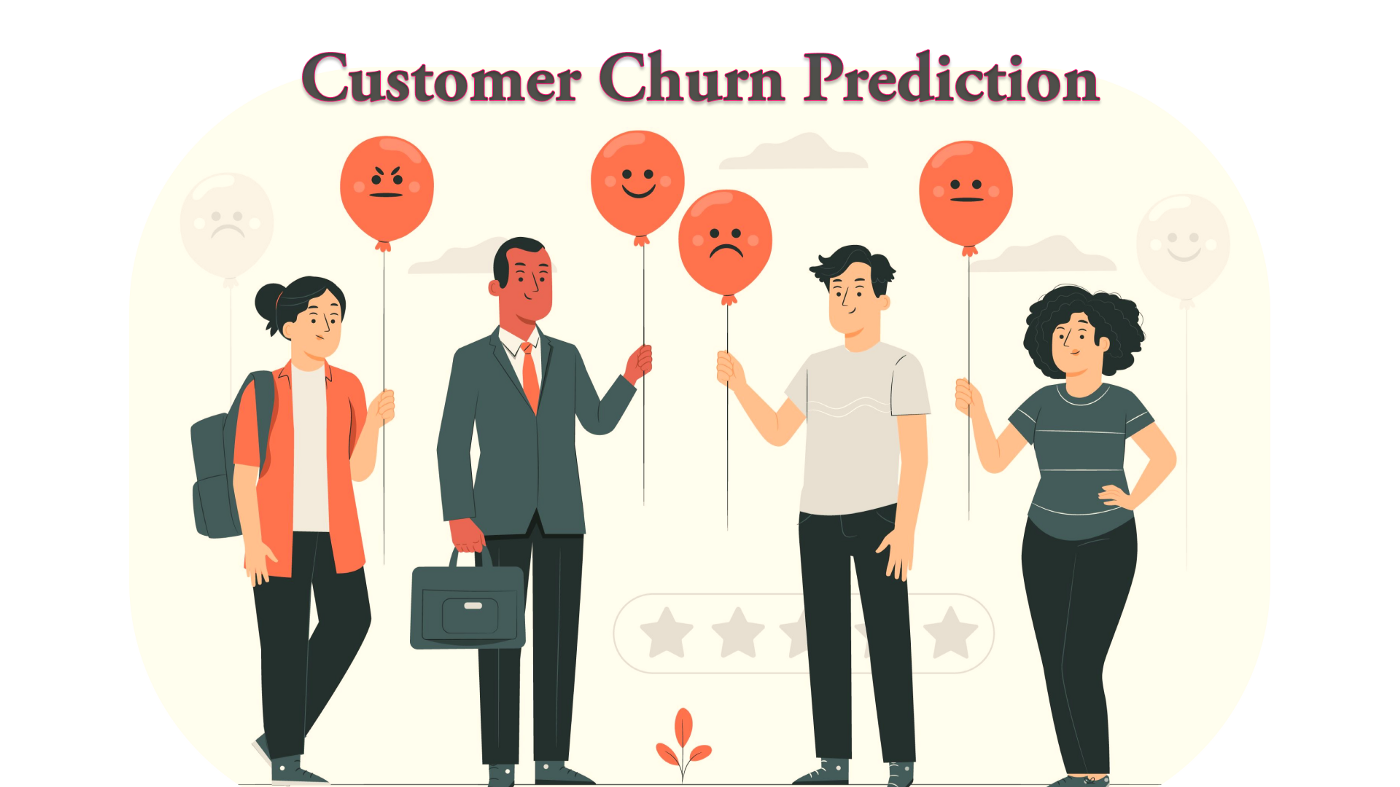

# 📊 Customer Churn Analysis

## 📝 Introduction  
Customer churn is a critical challenge for businesses, especially in the banking sector. Understanding the factors influencing customer retention can help companies develop strategies to reduce churn rates and improve customer loyalty. In this project, we analyze a dataset containing customer information and attempt to predict whether a customer will churn (leave the bank) based on various features.

## 🎯 Aim  
The primary objective of this project is to build a machine learning model to predict customer churn. By analyzing key factors such as credit score, account balance, number of products, and customer activity, we aim to identify patterns and trends that influence a customer’s decision to stay or leave.

## 📂 Dataset Description  
The dataset contains information about **bank customers**, including their demographic details, financial status, and account activity. The **target variable** is `Exited`, which indicates whether a customer has churned (1) or remained (0).

### 🏷 Data Fields:
- **id** 🔢 – Unique identifier for each record  
- **CustomerId** 🆔 – Unique ID assigned to each customer  
- **Surname** 👤 – Customer's last name  
- **CreditScore** 📈 – Credit score of the customer (higher is better)  
- **Geography** 🌍 – Country of residence (France, Spain, Germany)  
- **Gender** 🚻 – Customer's gender (Male/Female)  
- **Age** 🎂 – Customer’s age  
- **Tenure** 📅 – Number of years the customer has been with the bank  
- **Balance** 💰 – Account balance (in currency units)  
- **NumOfProducts** 🛍 – Number of products the customer uses at the bank  
- **HasCrCard** 💳 – Whether the customer owns a credit card (1 = Yes, 0 = No)  
- **IsActiveMember** ✅ – Whether the customer is an active bank member (1 = Yes, 0 = No)  
- **EstimatedSalary** 💵 – Estimated annual salary of the customer  
- **Exited** ❌ – **Target variable**: 1 if the customer churned, 0 if they stayed  

## Requirements

In [2]:
import pandas as pd
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

## Import Data

In [3]:
df=pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')

## EDA (Exploratory Data Analysis)

In [4]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.shape

(165034, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [8]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


## Data Visaulization

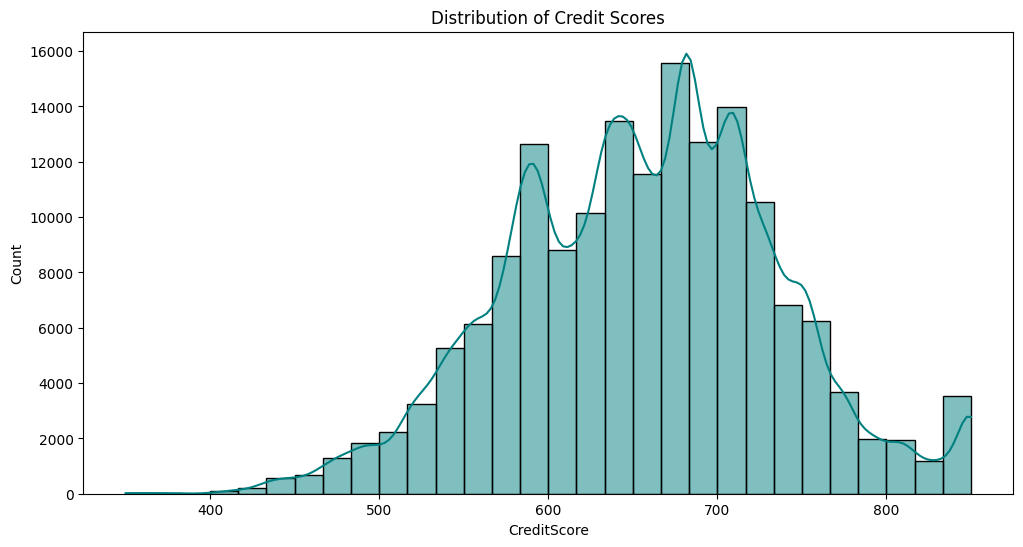

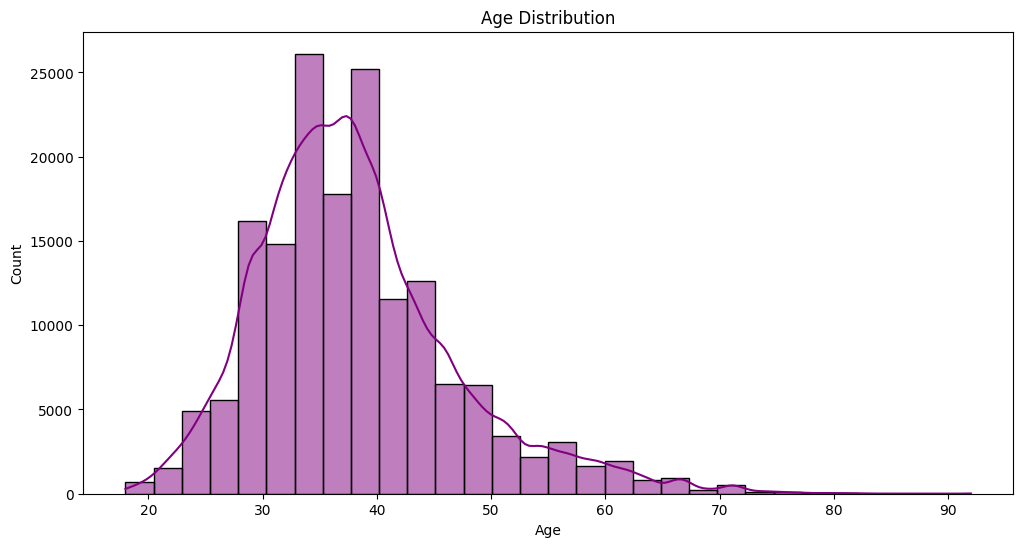

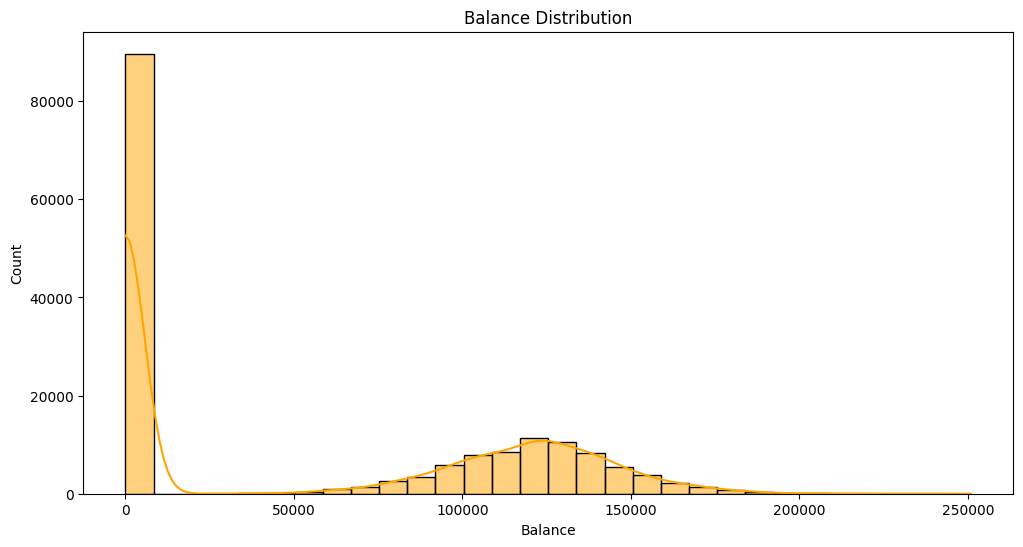

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(df['CreditScore'], bins=30, kde=True, color='teal')
plt.title('Distribution of Credit Scores')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df['Age'], bins=30, kde=True, color='purple')
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df['Balance'], bins=30, kde=True, color='orange')
plt.title('Balance Distribution')
plt.show()

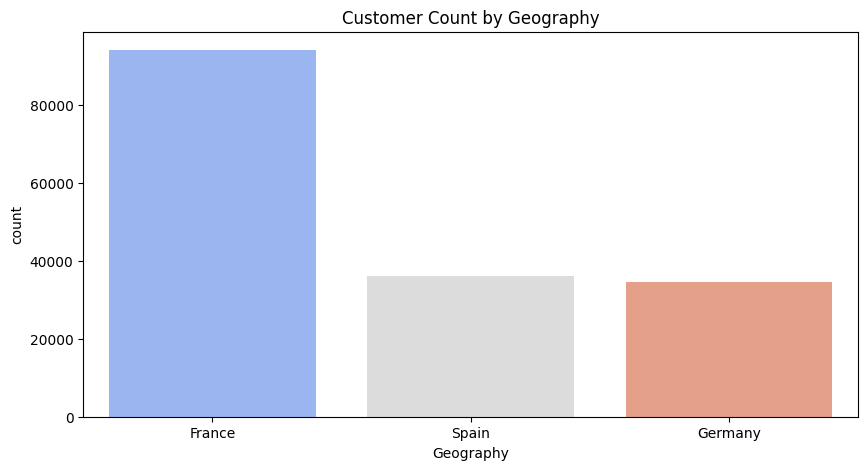

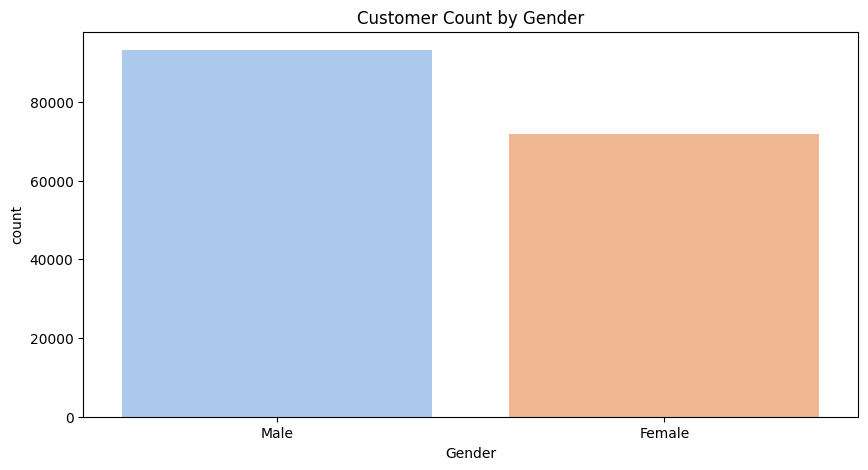

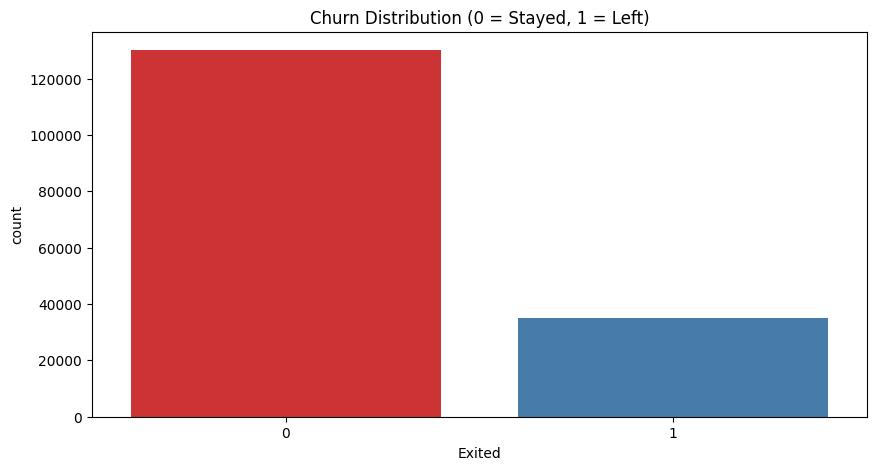

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(x='Geography', data=df, palette='coolwarm')
plt.title('Customer Count by Geography')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Customer Count by Gender')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='Exited', data=df, palette='Set1')
plt.title('Churn Distribution (0 = Stayed, 1 = Left)')
plt.show()

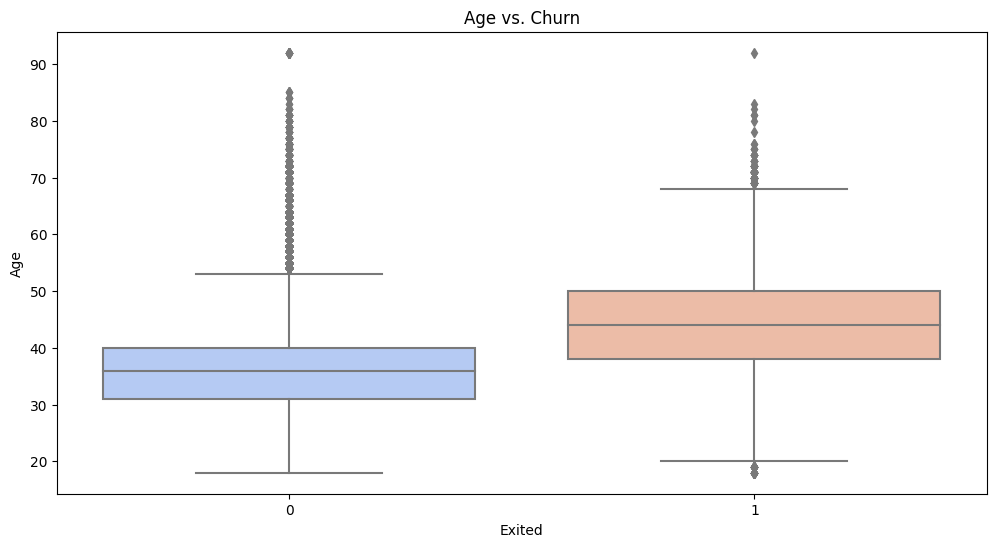

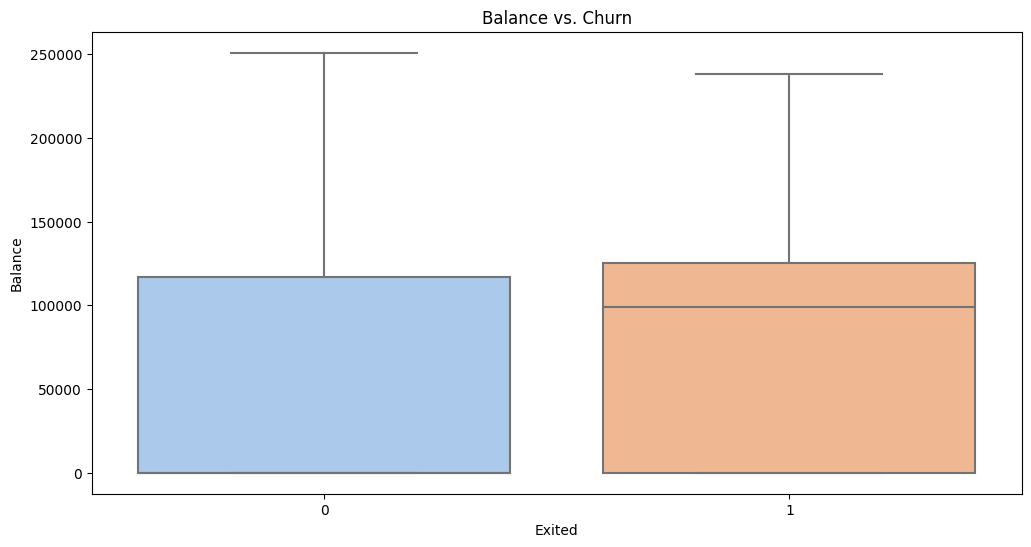

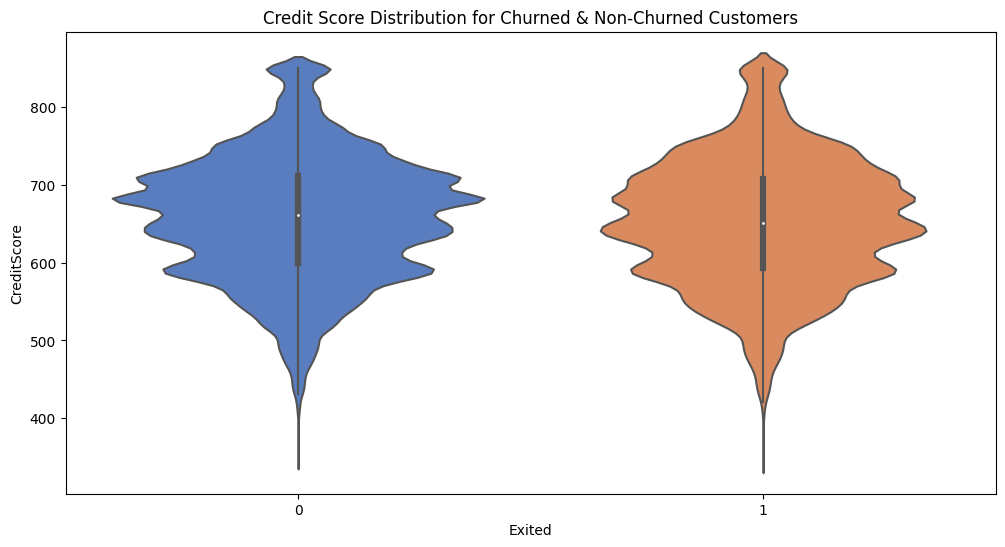

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Exited', y='Age', data=df, palette='coolwarm')
plt.title('Age vs. Churn')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='Exited', y='Balance', data=df, palette='pastel')
plt.title('Balance vs. Churn')
plt.show()

plt.figure(figsize=(12,6))
sns.violinplot(x='Exited', y='CreditScore', data=df, palette='muted')
plt.title('Credit Score Distribution for Churned & Non-Churned Customers')
plt.show()

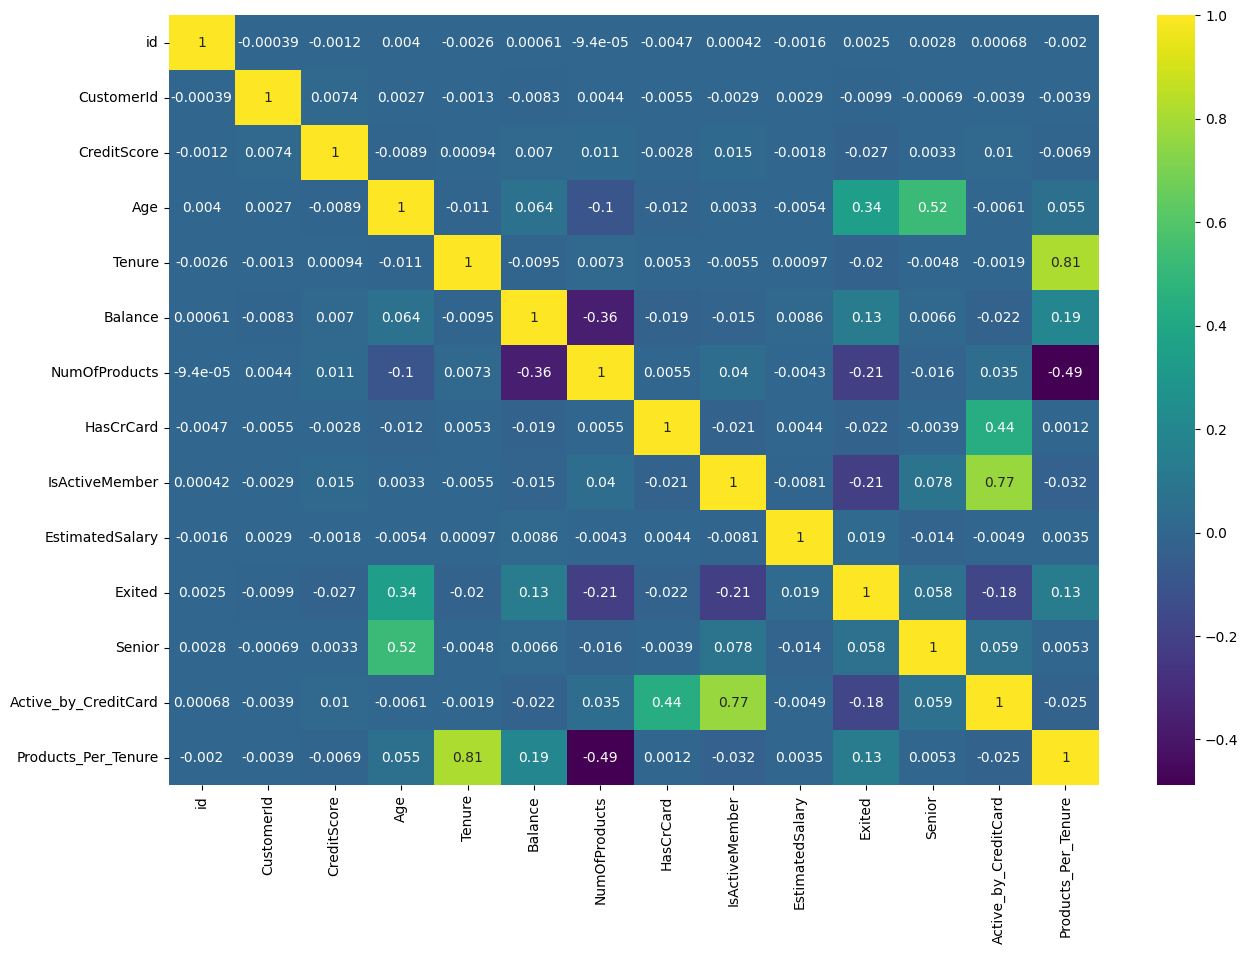

In [54]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis');

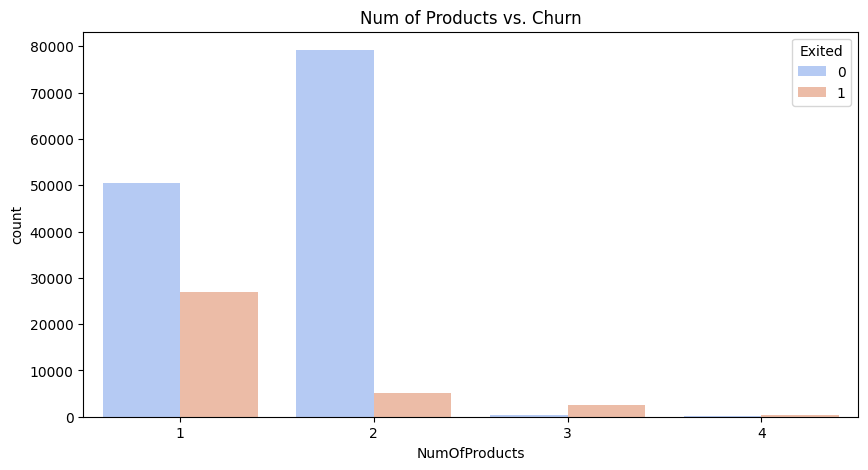

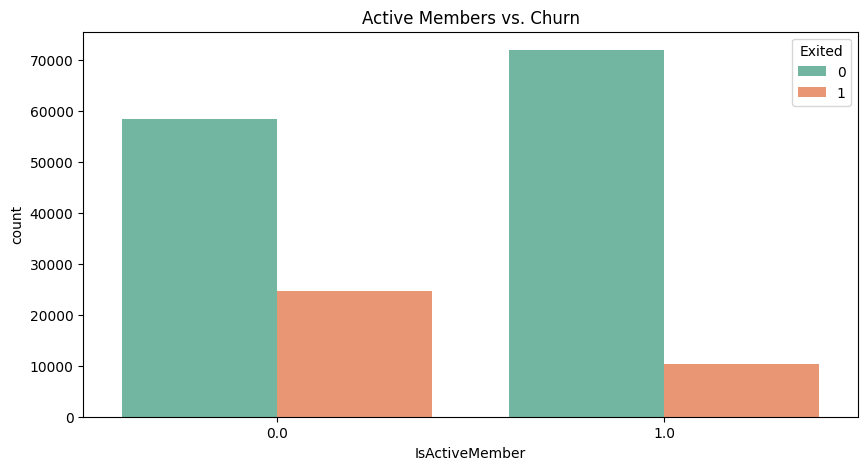

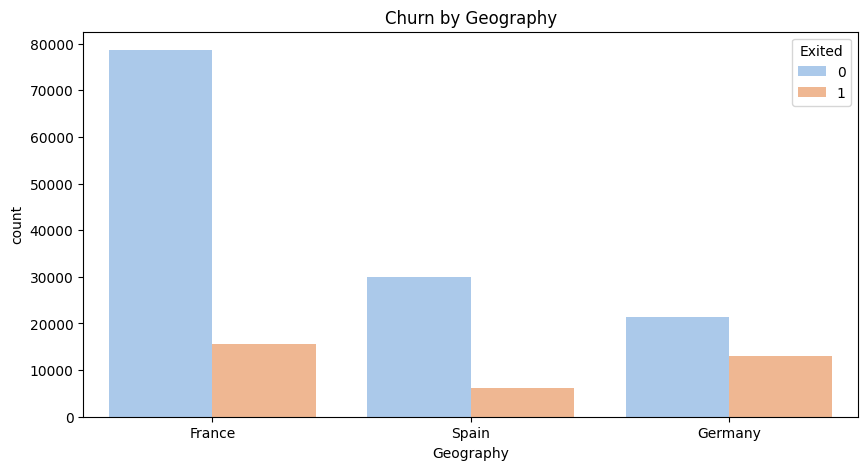

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(x='NumOfProducts', hue='Exited', data=df, palette='coolwarm')
plt.title('Num of Products vs. Churn')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette='Set2')
plt.title('Active Members vs. Churn')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='Geography', hue='Exited', data=df, palette='pastel')
plt.title('Churn by Geography')
plt.show()

## Feature Engineering

In [4]:
def feature_engineering(df):
    df['Senior']=df['Age'].apply(lambda x:1 if x>=60 else 0)
    df['Active_by_CreditCard']=df['HasCrCard']*df['IsActiveMember']
    df['Products_Per_Tenure']=df['Tenure']/df['NumOfProducts']
    df['AgeCat']=np.round(df['Age']/20).astype('int').astype('category')

In [5]:
feature_engineering(df)

## Modelling with Conversational Models

In [6]:
x=df.drop(['id','CustomerId','Surname','Exited'],axis=1)
y=df[['Exited']]

In [7]:
x=pd.get_dummies(x,drop_first=True)

In [8]:
def classification_algo(x, y, confusion_mtr=False, classification_rpt=False):
    g = GaussianNB()
    b = BernoulliNB()
    l = LogisticRegression()
    d = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    h = GradientBoostingClassifier()
    k = KNeighborsClassifier()
    
    algos = [g, b, l, d, rf, h, k]
    algo_names = ['Gaussian NB', 'Bernoulli NB', 'Logistic Regression', 
                  'Decision Tree Classifier', 'Random Forest Classifier', 
                  'Gradient Boosting Classifier', 'KNeighbors Classifier']

    accuracy = []
    confusion = []
    classification = []
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Prepare a DataFrame to store results
    result = pd.DataFrame(columns=['Accuracy Score', 'Confusion Matrix', 'Classification Report'], 
                          index=algo_names)

    labels = sorted(y["Exited"].unique())

    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test, p))
        confusion.append(confusion_matrix(y_test, p, labels=labels))
        classification.append(classification_report(y_test, p))

    # Store results
    result['Accuracy Score'] = accuracy
    result['Confusion Matrix'] = confusion
    result['Classification Report'] = classification

    # Sort results by accuracy
    r_table = result.sort_values('Accuracy Score', ascending=False)
    
    if confusion_mtr:
        for index, row in r_table.iterrows():
            confusion_mat = np.array(row['Confusion Matrix'])
            print(f"Confusion Matrix of {index}")
            plt.figure(figsize=(5, 4))
            sns.heatmap(confusion_mat, annot=True, fmt="d", 
                        xticklabels=labels, yticklabels=labels, cmap="Blues")
            plt.xlabel("Predicted Labels")
            plt.ylabel("True Labels")
            plt.show()
    
    if classification_rpt:
        for index, row in r_table.iterrows():
            print(f"Classification Report of {index}:")
            print(row['Classification Report'])

    return r_table[['Accuracy Score']]


Confusion Matrix of Gradient Boosting Classifier


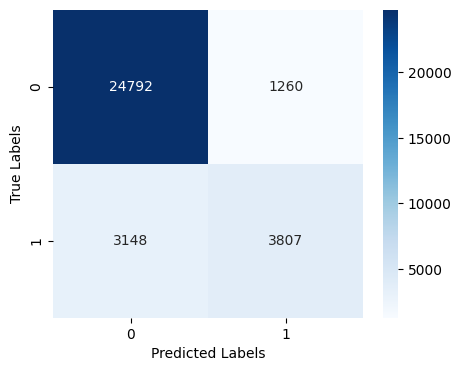

Confusion Matrix of Random Forest Classifier


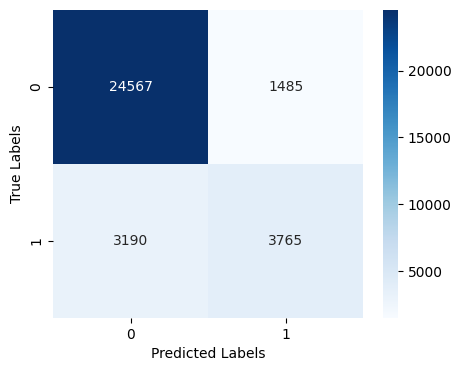

Confusion Matrix of Bernoulli NB


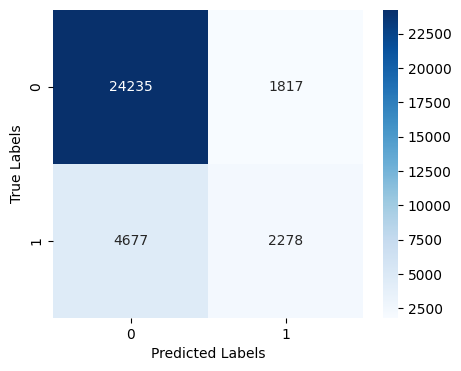

Confusion Matrix of Decision Tree Classifier


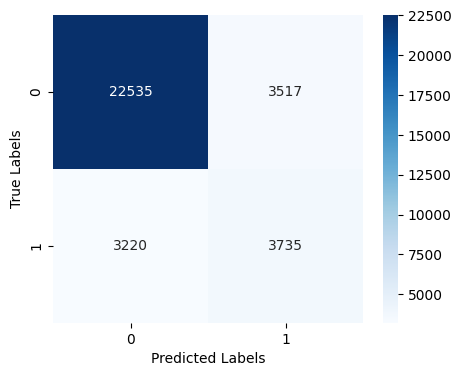

Confusion Matrix of Gaussian NB


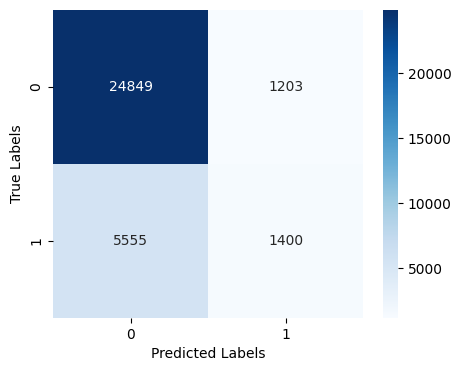

Confusion Matrix of Logistic Regression


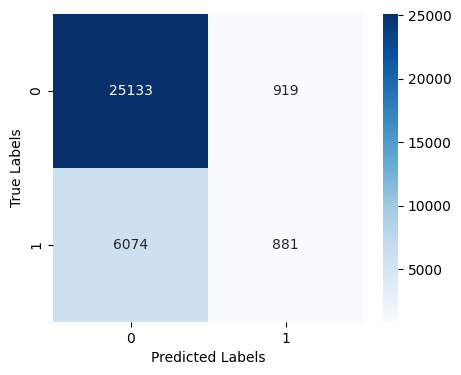

Confusion Matrix of KNeighbors Classifier


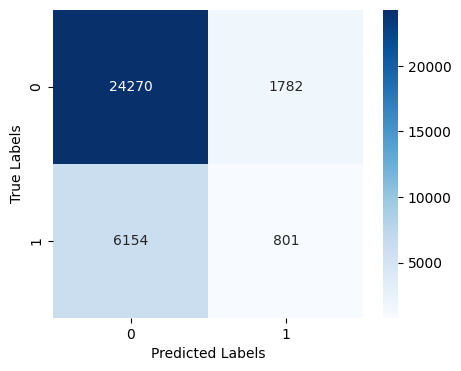

Classification Report of Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.75      0.55      0.63      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007

Classification Report of Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     26052
           1       0.72      0.54      0.62      6955

    accuracy                           0.86     33007
   macro avg       0.80      0.74      0.77     33007
weighted avg       0.85      0.86      0.85     33007

Classification Report of Bernoulli NB:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     26052
           1       0.56      0.33      0.41      6955

    accuracy                         

,Accuracy Score
Gradient Boosting Classifier,0.866453
Random Forest Classifier,0.858363
Bernoulli NB,0.803254
Decision Tree Classifier,0.795892
Gaussian NB,0.795256
Logistic Regression,0.788136
KNeighbors Classifier,0.759566


In [9]:
classification_algo(x,y,confusion_mtr=True,classification_rpt=True)

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
h = GradientBoostingClassifier()
model=h.fit(x_train, y_train)

In [57]:
import joblib
joblib.dump(model, 'best_classification_model.pkl')

['best_classification_model.pkl']

## Testing the Best Conversational Model

In [21]:
x=df.drop(['id','CustomerId','Surname','Exited'],axis=1)
y=df[['Exited']]

In [22]:
x=pd.get_dummies(x,drop_first=True)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
h = GradientBoostingClassifier()
model=h.fit(x_train, y_train)

In [24]:
df_test=pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

In [25]:
submission=pd.DataFrame({
    'id':df_test['id']
})

In [26]:
feature_engineering(df_test)

In [27]:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Senior,Active_by_CreditCard,Products_Per_Tenure,AgeCat
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75,0,0.0,1.0,1
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27,0,0.0,2.0,2
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09,0,0.0,3.5,2
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57,0,0.0,8.0,2
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,0,0.0,10.0,2


In [28]:
df_test=df_test.drop(['id','CustomerId','Surname'],axis=1)

In [29]:
df_test=pd.get_dummies(df_test,drop_first=True)

In [30]:
predicstions=model.predict(df_test)

In [32]:
submission['Exited']=predicstions

## Modelling with Deep Learning

In [35]:
x=df.drop(['id','CustomerId','Surname','Exited'],axis=1)
y=df[['Exited']]

In [36]:
x=pd.get_dummies(x,drop_first=True)

In [37]:
x_train , x_test, y_train, y_test =train_test_split(x,y,test_size=.2,random_state=42)

In [38]:
model2=Sequential()
model2.add(Dense(8, activation='relu'))
model2.add(Dense(32,activation='relu')) 
model2.add(Dense(64,activation='relu')) 
model2.add(Dense(128,activation='relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(2,activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
x_train.shape,y_train.shape

((132027, 18), (132027, 1))

In [41]:
history=model2.fit(x_train,y_train,epochs=50,validation_split=.20,verbose=1)

Epoch 1/50
3301/3301 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7870 - loss: 0.5181 - val_accuracy: 0.7885 - val_loss: 0.5159
Epoch 2/50
3301/3301 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7877 - loss: 0.5173 - val_accuracy: 0.7885 - val_loss: 0.5160
Epoch 3/50
3301/3301 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7890 - loss: 0.5155 - val_accuracy: 0.7885 - val_loss: 0.5158
Epoch 4/50
3301/3301 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7888 - loss: 0.5157 - val_accuracy: 0.7885 - val_loss: 0.5157
Epoch 5/50
3301/3301 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7881 - loss: 0.5172 - val_accuracy: 0.7885 - val_loss: 0.5162
Epoch 6/50
3301/3301 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7882 - loss: 0.5165 - val_accuracy: 0.7885 - val_loss: 0.5160
Epoch 7/50
3301/3301 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7905 - loss: 0.5135 - val_accuracy: 0.7885 - val_loss: 0.5160
Epoch 8/50
3301/3301 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7890 - loss: 0.5155 - 

In [42]:
predictions=model2.predict(x_test)
predictions_labels = np.argmax(predictions, axis=1)
accuracy_score(predictions_labels,y_test)

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


0.7892871209137455

## Testing the Deep Learning Model

In [43]:
predictions=model2.predict(df_test)

3439/3439 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


In [44]:
submission['Exited']=predictions

In [45]:
submission.head()

,id,Exited
0,165034,0.788995
1,165035,0.788995
2,165036,0.788995
3,165037,0.788995
4,165038,0.788995


## 🏁 Conclusion

### 🔍 Summary of Model Performance  
In this project, we aimed to predict customer churn using both **conventional machine learning classifiers** and **deep learning models**. The models were evaluated based on their **accuracy scores**, and the results are summarized below.

### 📊 Machine Learning Model Performance:
- **Gradient Boosting Classifier** 🌟 – **0.8664** (Best performing model)
- **Random Forest Classifier** 🌲 – **0.8583**
- **Bernoulli Naïve Bayes** 📊 – **0.8033**
- **Decision Tree Classifier** 🌿 – **0.7959**
- **Gaussian Naïve Bayes** 📈 – **0.7953**
- **Logistic Regression** 🔢 – **0.7881**
- **K-Nearest Neighbors** 📍 – **0.7596**

The **Gradient Boosting Classifier** achieved the highest accuracy, making it the most effective model for predicting customer churn. **Random Forest** also performed well, demonstrating the power of ensemble learning techniques.

### 🤖 Deep Learning Model Performance:
We also trained a **deep learning model**, which aimed to capture complex patterns in the data. The results showed that deep learning was competitive but did not surpass **Gradient Boosting** in accuracy. However, deep learning models may still be useful for further fine-tuning and capturing non-linear relationships.